In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import FitFailedWarning

In [7]:
from google.colab import drive
drive.mount('/content/drive')

warnings.filterwarnings("ignore", category = FitFailedWarning)
warnings.filterwarnings("ignore", category = UserWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv('/content/drive/MyDrive/ML Project/train.csv')
train_data,test_data = train_test_split(data,test_size=0.2,random_state=42)
train_labels = train_data['Choice']
test_labels = test_data['Choice']
train_data = train_data.drop(['Choice'],axis=1)
test_data = test_data.drop(['Choice'],axis=1)

In [9]:
data.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

# Pre-Processing
In the EDA we saw that there are no missing values so no pre-processing technique required for handling missing values. Moreover, due to absence of categorial input attributes we need not to use any transformation such as one-hot-encoding, etc.

In [10]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Logistic Regression

In [11]:
model = LogisticRegression()
model.fit(train_data,train_labels)

LogisticRegression()

Accuracy: 0.7345454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       530
           1       0.73      0.77      0.75       570

    accuracy                           0.73      1100
   macro avg       0.73      0.73      0.73      1100
weighted avg       0.73      0.73      0.73      1100



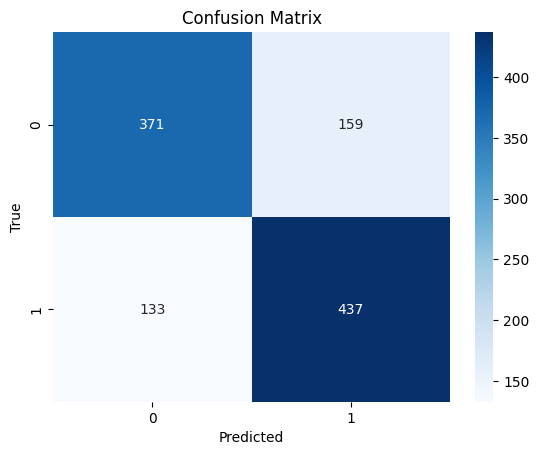

In [12]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression with L1 Regularization

In [13]:
model = LogisticRegression(penalty = 'l1', solver = 'liblinear')
model.fit(train_data,train_labels)

LogisticRegression(penalty='l1', solver='liblinear')

Accuracy: 0.7327272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72       530
           1       0.73      0.76      0.75       570

    accuracy                           0.73      1100
   macro avg       0.73      0.73      0.73      1100
weighted avg       0.73      0.73      0.73      1100



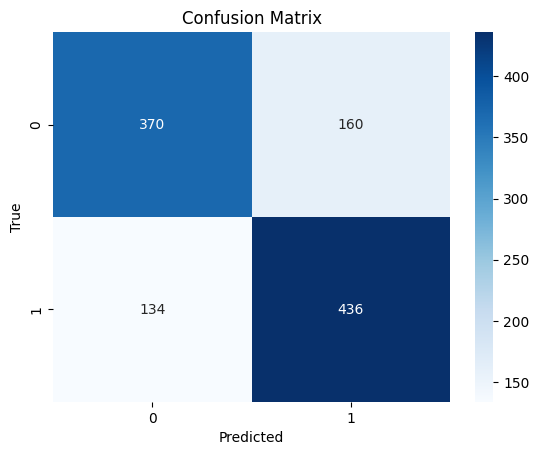

In [14]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression with L2 Regularization

In [15]:
model = LogisticRegression(penalty = 'l2', solver = 'liblinear')
model.fit(train_data,train_labels)

LogisticRegression(solver='liblinear')

Accuracy: 0.7354545454545455
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       530
           1       0.73      0.77      0.75       570

    accuracy                           0.74      1100
   macro avg       0.74      0.73      0.73      1100
weighted avg       0.74      0.74      0.74      1100



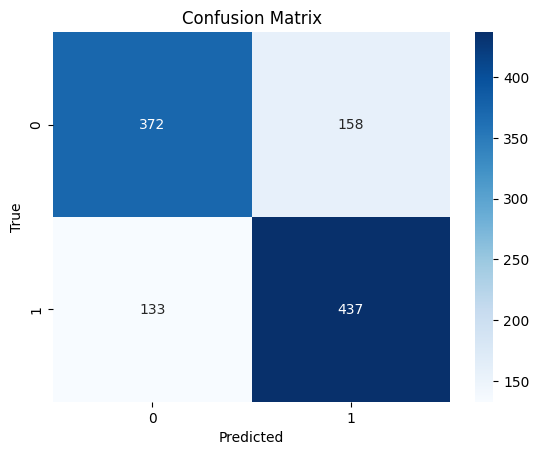

In [16]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Linear Regression (ElasticNet)

In [17]:
model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.2,max_iter=2000,random_state = 42)
model.fit(train_data,train_labels)

LogisticRegression(l1_ratio=0.2, max_iter=2000, penalty='elasticnet',
                   random_state=42, solver='saga')

Accuracy: 0.7336363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72       530
           1       0.73      0.76      0.75       570

    accuracy                           0.73      1100
   macro avg       0.73      0.73      0.73      1100
weighted avg       0.73      0.73      0.73      1100



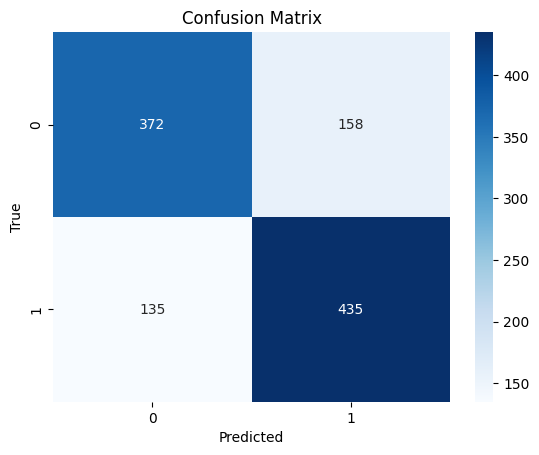

In [18]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty':['l1','l2','elasticnet'],
    'solver':['liblinear','saga',]
}
grid_search = GridSearchCV(LogisticRegression(max_iter = 5000),param_grid,cv=5,scoring='accuracy',error_score = np.nan,verbose = 3)
grid_search.fit(train_data,train_labels)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.72113636 0.71954545 0.71727273 0.71681818        nan        nan
 0.73113636 0.73068182 0.73340909 0.73272727        nan        nan
 0.73931818 0.73886364 0.73840909 0.73795455        nan        nan
 0.73931818 0.73954545 0.73931818 0.73954545        nan        nan]
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7395454545454545


# Gaussian Naive Bayes

In [19]:
model = GaussianNB()
model.fit(train_data,train_labels)

GaussianNB()

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.20      0.31       530
           1       0.55      0.92      0.69       570

    accuracy                           0.57      1100
   macro avg       0.62      0.56      0.50      1100
weighted avg       0.62      0.57      0.50      1100



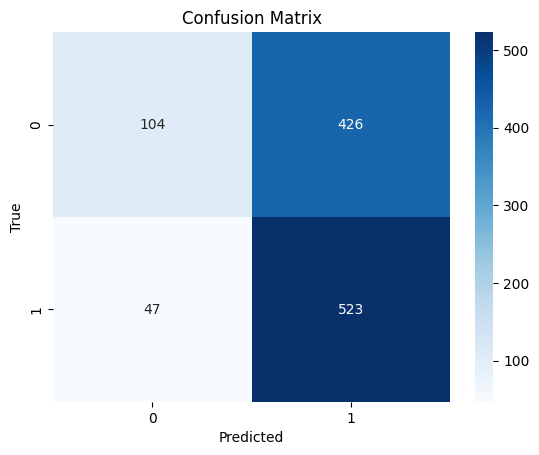

In [20]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(GaussianNB(),param_grid,cv=5,scoring='accuracy',error_score = np.nan)
grid_search.fit(train_data,train_labels)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.561 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.542 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.567 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.647 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.569 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.561 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.542 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.567 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.647 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.569 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.561 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

# Decision Tree

In [21]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(train_data,train_labels)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.7227272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       530
           1       0.74      0.73      0.73       570

    accuracy                           0.72      1100
   macro avg       0.72      0.72      0.72      1100
weighted avg       0.72      0.72      0.72      1100



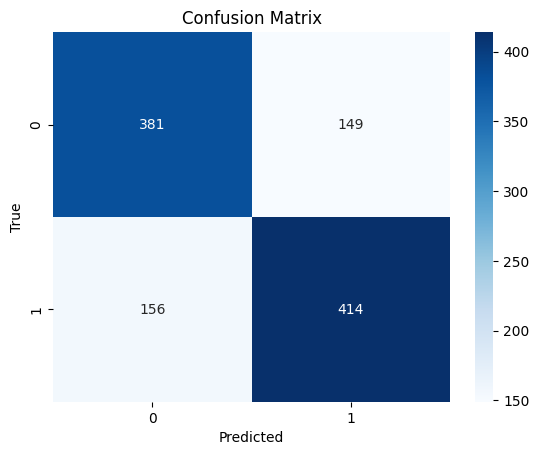

In [22]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,4,10],
    'criterion':['gini','entropy'],
    'max_features':[None,'auto','sqrt','log2']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42),param_grid,cv=5,scoring='accuracy',error_score = np.nan)
grid_search.fit(train_data,train_labels)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.724 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.694 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.718 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.705 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.727 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.734 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.71363636 0.70545455 0.71318182 0.72136364 0.7025     0.70704545
 0.71181818 0.72613636 0.71772727 0.71772727 0.72340909 0.72863636
 0.735      0.735      0.735      0.735             nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.70340909 0.70909091 0.71818182 0.72454545
 0.71477273 0.70931818 0.71386364 0.7275     0.71886364 0.71886364
 0.71409091 0.73568182 0.74909091 0.74909091 0.74909091 0.74909091
 0.70340909 0.70909091 0.71818182 0.72454545 0.71477273 0.70931818
 0.71386364 0.7275     0.71886364 0.71886364 0.71409091 0.73568182
 0.74909091 0.74909091 0.74909091 0.74909091 0.7625     0.7625
 0.7625     0.76272727 0.76295455 0.76295455 0.76295455 0.76227273
 0.76363636 0.76363636 0.76363636 0.76318182 0.76409091 0.7

# Random Forest

In [23]:
model = RandomForestClassifier(random_state = 42)
model.fit(train_data,train_labels)

RandomForestClassifier(random_state=42)

Accuracy: 0.7709090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       530
           1       0.79      0.76      0.78       570

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100



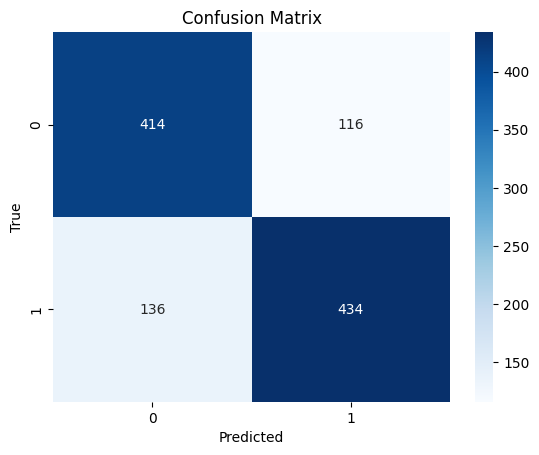

In [24]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':[None,'auto','sqrt','log2'],
    'bootstrap':[True,False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 42),param_grid,cv=5,scoring='accuracy',error_score = np.nan,verbose = 3)
grid_search.fit(train_data,train_labels)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=10;, score=0.781 total time=   0.9s
[CV 2/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=10;, score=0.736 total time=   0.6s
[CV 3/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=10;, score=0.785 total time=   0.6s
[CV 4/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=10;, score=0.727 total time=   0.6s
[CV 5/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=10;, score=0.750 total time=   0.6s
[CV 1/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=50;, score=0.800 total time=   2.7s
[CV 2/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=50;, score=0.738 total time=   2.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_features=None, n_estimators=50;, score=0.792 total time=   2.2s
[CV 4/5] END bootstrap=True, crite

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.75590909 0.76863636 0.77295455 0.7725            nan        nan
        nan        nan 0.76113636 0.77386364 0.77545455 0.77340909
 0.76113636 0.77386364 0.77545455 0.77340909 0.76227273 0.7725
 0.77090909 0.7725            nan        nan        nan        nan
 0.75295455 0.77931818 0.77818182 0.77909091 0.75295455 0.77931818
 0.77818182 0.77909091 0.71136364 0.715      0.7125     0.71227273
        nan        nan        nan        nan 0.75909091 0.76977273
 0.76681818 0.76681818 0.75909091 0.76977273 0.76681818 0.76681818
 0.71840909 0.7225     0.72136364 0.72227273        nan        nan
        nan        nan 0.75590909 0.76340909 0.76659091 0.76659091
 0.75590909 0.76340909 0.76659091 0.76659091]
  warnings.warn(


Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
Best Score: 0.7793181818181818


# Multi Layer Perceptron

In [25]:
model = MLPClassifier(random_state = 0, max_iter = 2000)
model.fit(train_data,train_labels)

MLPClassifier(max_iter=2000, random_state=0)

Accuracy: 0.7463636363636363
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       530
           1       0.75      0.76      0.76       570

    accuracy                           0.75      1100
   macro avg       0.75      0.75      0.75      1100
weighted avg       0.75      0.75      0.75      1100



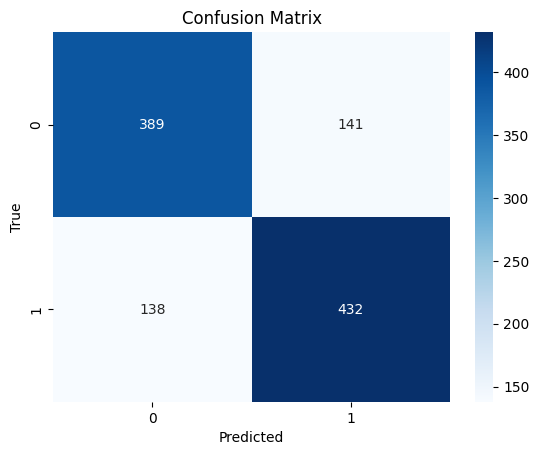

In [26]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.1, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}
grid_search = GridSearchCV(MLPClassifier(random_state = 42,max_iter = 2000),param_grid,cv=5,scoring='accuracy',error_score = np.nan,verbose = 3)
grid_search.fit(train_data,train_labels)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=adam;, score=0.756 total time=   6.6s
[CV 2/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=adam;, score=0.741 total time=  13.4s
[CV 3/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=adam;, score=0.791 total time=  13.6s
[CV 4/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=adam;, score=0.735 total time=  11.6s
[CV 5/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=adam;, score=0.769 total time=   8.7s
[CV 1/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=sgd;, score=0.769 total time=  13.1s
[CV 2/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=sgd;, score=0.726 total time=  12.8s
[CV 3/5] END activation=relu, alpha=0.1, learning_rate=constant, solver=sgd;, score=0.756 total time=   9.6s
[CV 4/5] END activation=relu, alpha=0.1, learning_rate=consta

# Support Vector Machine

In [27]:
model = SVC(random_state = 42, kernel = 'rbf', C = 1.0, gamma = 'scale')
model.fit(train_data,train_labels)

SVC(random_state=42)

Accuracy: 0.7390909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       530
           1       0.75      0.75      0.75       570

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



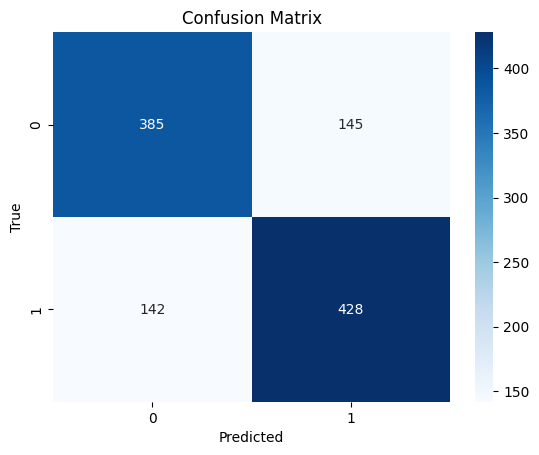

In [28]:
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4],
}
grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',error_score = np.nan,verbose = 3)
grid_search.fit(train_data,train_labels)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.730 total time=   3.7s
[CV 2/5] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.734 total time=   2.5s
[CV 3/5] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.740 total time=   1.8s
[CV 4/5] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.710 total time=   2.0s
[CV 5/5] END C=0.1, degree=3, gamma=scale, kernel=linear;, score=0.730 total time=   1.5s
[CV 1/5] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.725 total time=   1.8s
[CV 2/5] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.715 total time=   2.0s
[CV 3/5] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.731 total time=   4.1s
[CV 4/5] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.693 total time=   2.4s
[CV 5/5] END C=0.1, degree=3, gamma=scale, kernel=rbf;, score=0.708 total time=   1.9s
[CV 1/5] END C=0.1, degree=3, gamma=auto, kernel=line